
Accuracy del model amb PyTorch = 0.8586


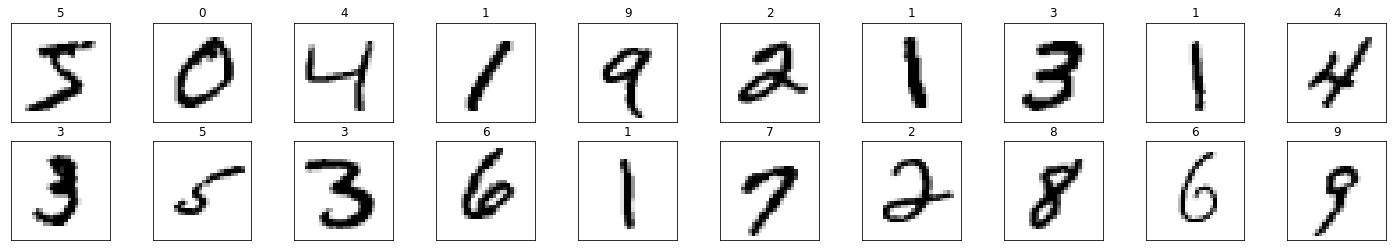

In [8]:

# Se importan las librerias necesarias para el proyecto

import torch 
import torchvision
import numpy as np 
import matplotlib.pyplot as plt 

# Se especifican las constantes

epochs = 10 
batch_size=64

# Se carga el conjunto de datos.

xy_trainPT = torchvision.datasets.MNIST(root='./data', train=True, download=True,transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()])) 
xy_trainPT_loader = torch.utils.data.DataLoader(xy_trainPT, batch_size=batch_size)

#Para comprobar el conjunto de datos se utiliza la libreria matplotlib.pyplot que nos permite comparar los datos de ambas herramientas. 

fig = plt.figure(figsize=(25, 4)) 
for idx in np.arange(20):
  ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
  image, label = xy_trainPT [idx]

  ax.imshow(torch.squeeze(image, dim = 0).numpy(), 
             cmap=plt.cm.binary)
  ax.set_title(str(label))

#Definimos el modelo

modelPT= torch.nn.Sequential(   
         torch.nn.Linear(784,10),
         torch.nn.Sigmoid(), 
         torch.nn.Linear(10,10), 
         torch.nn.LogSoftmax(dim=1) 
         )

#Definimos el Optimizador y la funcion de perdida

criterion = torch.nn.NLLLoss() 
optimizer = torch.optim.SGD(modelPT.parameters(), lr=0.01)

#Entrenamiento del modelo

for e in range(epochs):
    for images, labels in xy_trainPT_loader:
        images = images.view(images.shape[0], -1)
        loss = criterion(modelPT(images), labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

#Evaluacion del modelo

xy_testPT = torchvision.datasets.MNIST(root='./data', train=False, download=True, 
            transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))

xy_test_loaderPT = torch.utils.data.DataLoader(xy_testPT)

correct_count, all_count = 0, 0
for images,labels in xy_test_loaderPT:
  for i in range(len(labels)):
    img = images[i].view(1, 784)

    logps = modelPT(img)
    ps = torch.exp(logps)
    probab = list(ps.detach().numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("\nAccuracy del modelo de PyTorch =", (correct_count/all_count))